In [2]:
from numpy import *
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

/Users/patrick.lee/anaconda/envs/deeplearning/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def compute_error_for_line_given_points_matrix(b, m, points):

    x = points[:, 0]
    y = points[:, 1]

    ms = np.full(x.shape, m)
    bs = np.full(x.shape, b)

    error = np.mean(np.power((y - (ms * x + bs)), 2))

    return error


def compute_error_for_line_given_points(b, m, points):
    # initialize it at 0
    total_error = 0
    # for every point

    for i in range(0, len(points)):
        # get the x value
        x = points[i, 0]
        # get the y value
        y = points[i, 1]
        # get the difference, square it, add it to the total
        total_error += (y - (m * x + b)) ** 2

    # get the average
    error = total_error / float(len(points))

    return error

In [4]:
# magic, the greatest
def step_gradient_matrix(b_current, m_current, points, learning_rate):

    # starting points for our gradient
    n = float(len(points))

    x = points[:, 0]
    y = points[:, 1]

    m_current_array = np.full(x.shape, m_current)
    b_current_array = np.full(x.shape, b_current)

    b_errors = -(2 / n) * (y - ((m_current_array * x) + b_current_array))
    m_errors = -(2 / n) * x * (y - ((m_current_array * x) + b_current_array))

    b_gradient = np.sum(b_errors)
    m_gradient = np.sum(m_errors)

    # update our b and m values using this partial derivatives
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]


def step_gradient(b_current, m_current, points, learning_rate):

    # starting points for our gradient
    b_gradient = 0
    m_gradient = 0
    n = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # direction with respect to b and m
        # computing partial derivatives of our error function
        b_gradient += -(2 / n) * (y - ((m_current * x) + b_current))
        m_gradient += -(2 / n) * x * (y - ((m_current * x) + b_current))

    # print("b:{0}, m:{1}".format(learning_rate * b_gradient, learning_rate * m_gradient))
    # update our b and m values using this partial derivatives
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

In [5]:
def gradient_descent_runner_matrix(points, starting_b, starting_m, learning_rate, num_iterations):
    # starting b and m
    b = starting_b
    m = starting_m

    # gradient descent
    for i in range(num_iterations):
        # print("b:{0}, m:{1}".format(b, m))
        # update b and m with the new more accurate b and m by performing
        # this gradient step
        b, m = step_gradient_matrix(b, m, array(points), learning_rate)
    return [b, m]


def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # starting b and m
    b = starting_b
    m = starting_m

    # gradient descent
    for i in range(num_iterations):
        # print("b:{0}, m:{1}".format(b, m))
        # update b and m with the new more accurate b and m by performing
        # this gradient step
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

...
...
...
...
...
[100, 200, 400, 800, 1600]
[0.104477, 0.211931, 0.427688, 0.884771, 1.752902]
[0.020225, 0.021897, 0.039736, 0.02968, 0.037174]


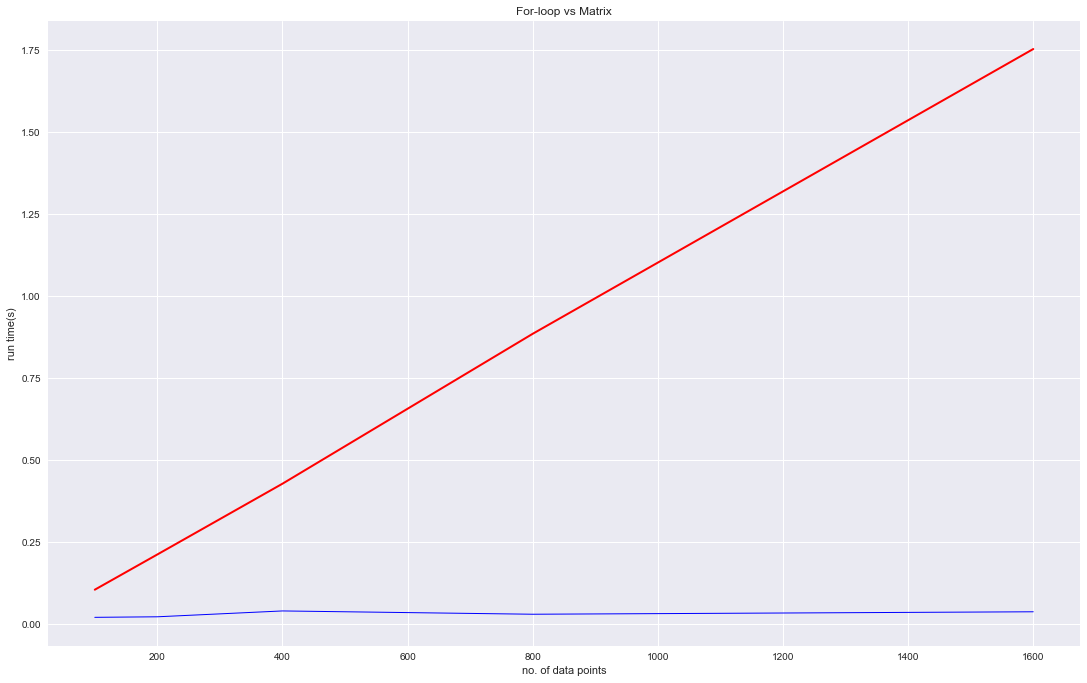

In [8]:
def double_the_size(array):
    return np.concatenate((array, array))
        
def run():

    # Step 1 - define our hyper-parameters
    # how fast should our model converge?
    learning_rate = 0.0001
    # y = mx + b (slope formula)
    initial_b = 0
    initial_m = 0
    num_iterations = 1000

    # Step 2 - collect our data
    points = genfromtxt('data.csv', delimiter=',')
    
    run_times = 5
    data_size_array = []
    for_loop_array = []
    matrix_array = []
    

    # Step 3 - train our model
    for i in xrange(run_times):        
        print('...')
        
        # run with for loop
        start_time = datetime.datetime.now()

        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        end_time = datetime.datetime.now()
        time_used = end_time - start_time
        for_loop_array.append(time_used.total_seconds())


        # run with matrix
        start_time = datetime.datetime.now()

        [b, m] = gradient_descent_runner_matrix(points, initial_b, initial_m, learning_rate, num_iterations)
        end_time = datetime.datetime.now()
        time_used = end_time - start_time
        matrix_array.append(time_used.total_seconds())
        
        data_size_array.append(points.shape[0])
        points = double_the_size(points)

    print(data_size_array)
    print(for_loop_array)
    print(matrix_array)

    
    fig = plt.figure()
    fig.set_size_inches(18.5, 11.5)
    ax = fig.add_subplot(111)
    l, = ax.plot(data_size_array, for_loop_array, 'r-', lw=2.0)
    l, = ax.plot(data_size_array, matrix_array, 'b-', lw=1.0)
    ax.set_xlabel('no. of data points')
    ax.set_ylabel('run time(s)')
    ax.set_title('For-loop vs Matrix')
    plt.show()
    

if __name__ == '__main__':
    run()